In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

In [6]:
go_dataframe = pd.read_table("../results/processed_data/goatools_output/mouth_opening/goatools_results_06_up.txt")
filtered_go_dataframe = go_dataframe[go_dataframe["p_fdr_bh"] <= 0.05]

filtered_terms = []
for study_items, go_term, count in zip(filtered_go_dataframe.study_items,filtered_go_dataframe["# GO"], filtered_go_dataframe["study_count"]):
    
    if count > 0:
        study_items = study_items.split(",")
        study_items = [item.strip() for item in study_items]


        for study_items2, go_term2, count2 in zip(filtered_go_dataframe.study_items, filtered_go_dataframe["# GO"], filtered_go_dataframe["study_count"]):
            if count2 > 0:
                if go_term != go_term2:
                    study_items2 = study_items2.split(",")
                    study_items2 = [item.strip() for item in study_items2]

                    if sorted(study_items2) == sorted(study_items):
                        goterms = [go_term, go_term2]
                        sorted_goterms = sorted(goterms)
                        if sorted_goterms not in filtered_terms:
                            filtered_terms.append(sorted_goterms)

# these GO-terms 
gos_to_remove = []
for godouble in filtered_terms:
    for go in godouble:
        if go != "GO:1901616":
            gos_to_remove.append(go)
            
gos_to_keep = []
for go in filtered_go_dataframe["# GO"].to_list():
    if go not in gos_to_remove:
        gos_to_keep.append(go)

sorted_filtered_go_dataframe = filtered_go_dataframe[filtered_go_dataframe["# GO"].isin(gos_to_keep)].sort_values(by="p_fdr_bh", ascending=True)
sorted_filtered_go_dataframe["pop_count"] = sorted_filtered_go_dataframe["ratio_in_pop"].apply(lambda x: int(x.split("/")[0]))
sorted_filtered_go_dataframe["count"] = sorted_filtered_go_dataframe["ratio_in_study"].apply(lambda x: int(x.split("/")[0]))
enriched_go_data = sorted_filtered_go_dataframe[sorted_filtered_go_dataframe["enrichment"] == "e"]
purified_go_data = sorted_filtered_go_dataframe[sorted_filtered_go_dataframe["enrichment"] == "p"]

In [11]:
go_id_labels = enriched_go_data["# GO"].to_numpy()
go_descriptions_labels = enriched_go_data["name"].to_numpy()
go_pvalue = enriched_go_data["p_fdr_bh"].to_numpy()
go_counts = enriched_go_data["study_count"].to_numpy()
go_clustersize = enriched_go_data["pop_count"].to_numpy()

pgo_id_labels = purified_go_data["# GO"].to_numpy()
pgo_descriptions_labels = purified_go_data["name"].to_numpy()
pgo_pvalue = purified_go_data["p_fdr_bh"].to_numpy()
pgo_counts = purified_go_data["study_count"].to_numpy() * -1
pgo_clustersize = purified_go_data["pop_count"].to_numpy()

#go_counts = np.append(go_counts, pgo_counts)
#go_clustersize = np.append(go_clustersize, pgo_clustersize)
#go_pvalue = np.append(go_pvalue, pgo_pvalue)

ylabels_go = []
for GO, name in zip(go_id_labels, go_descriptions_labels):
    ylabels_go.append(GO + "\n" + name)

#for GO, name in zip(pgo_id_labels, pgo_descriptions_labels):
#    ylabels_go.append(GO.split(":")[1] + " " + name)

/tmp/ipykernel_3966/1641584220.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(y=list(range(len(counts))), x=ratio, s=np.array(marker_size)*10, color=colors, cmap='RdBu_r', edgecolors="black", lw=2)
/tmp/ipykernel_3966/1641584220.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels,fontsize=22, fontweight="bold", rotation=45)


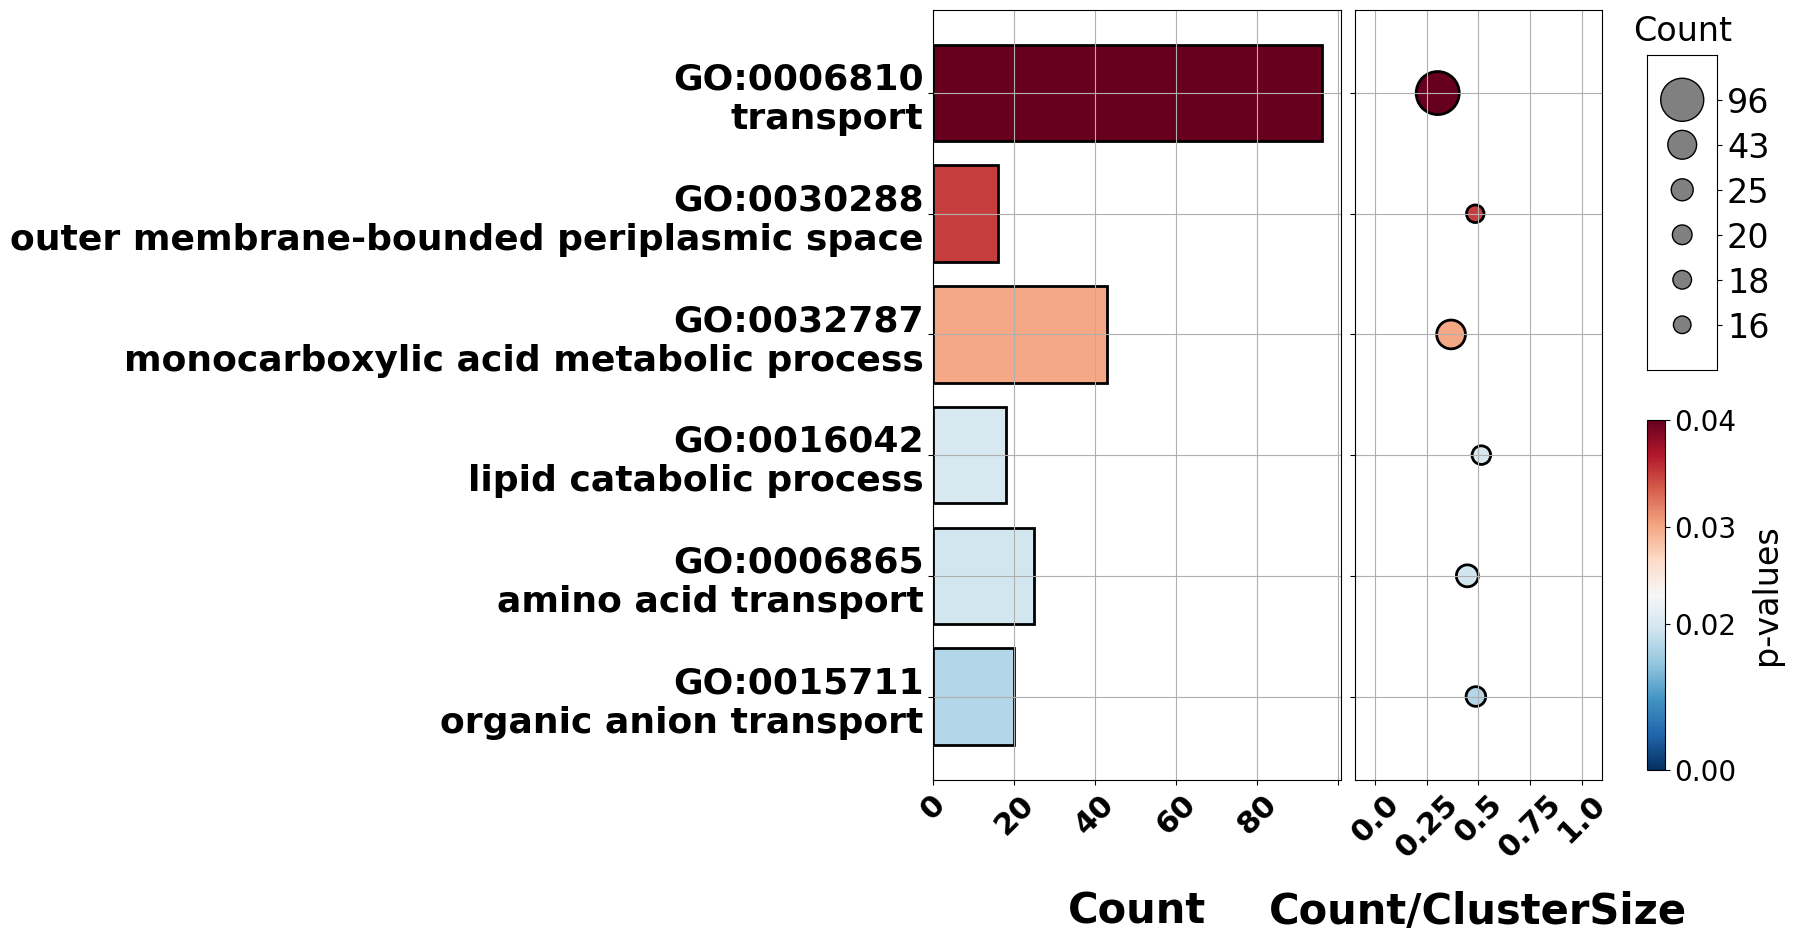

In [16]:
counts = go_counts
marker_size = np.abs(counts)
clustersize = go_clustersize
ratio = np.abs(counts)/clustersize
labels = ylabels_go

pvals = go_pvalue
pcolors = pvals
norm_p_values = np.array(pcolors) / max(pcolors)
colors=plt.cm.RdBu_r(norm_p_values)

sorted_arr = np.sort(marker_size[marker_size != 0])
indices = np.linspace(0, len(sorted_arr) - 1, 6).astype(int)
reduced_arr = sorted_arr[indices]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 10), sharey=False, gridspec_kw={'width_ratios': [2.8, 1.7, 1]})

ax1.sharey(ax2)

ax1.barh(labels,width=counts, color=colors, edgecolor="black", lw=2)
ax2.scatter(y=list(range(len(counts))), x=ratio, s=np.array(marker_size)*10, color=colors, cmap='RdBu_r', edgecolors="black", lw=2)

ax1.set_yticks(range(len(labels)))
ticks = ax1.get_xticks()
ticks = [int(x) for x in ticks]
xlabels = ax1.get_xticklabels()
xlabels = ["0"] + [x.get_text() for x in xlabels[1:-2]]+[""]
ax1.set_xticklabels(xlabels,fontsize=22, fontweight="bold", rotation=45)
ax1.set_yticklabels(labels, fontsize=26, fontdict={'fontweight':"bold"})
ax1.set_xlabel("Count", fontsize=30, labelpad=36,  fontdict={'fontweight':"bold"})
ax1.grid()

ax2.set_xlim(-0.1,1.1)
ax2.set_xticks([0.0,0.25,0.5,0.75,1.0])
ax2.set_xticklabels([0.0,0.25,0.5,0.75,1.0], fontsize=22, fontweight="bold", rotation=45)
ax2.set_xlabel("Count/ClusterSize", fontsize=30, labelpad=20,  fontdict={'fontweight':"bold"})
ax2.tick_params(axis='y', labelleft=False)
ax2.grid()

plt.subplots_adjust(left=0.2, wspace=0.05)

cbar = fig.colorbar(ScalarMappable(cmap='RdBu_r'), ax=[ax1, ax2], pad = 0.005)
cbar.set_label('p-values',fontsize=24, labelpad=10)
cbar.set_ticks([0.0,norm_p_values[2], norm_p_values[3], max(norm_p_values)])
cbar.set_ticklabels([f'{0.00:.2f}',f'{pvals[2]:.2f}',f'{pvals[3]:.2f}', f'{max(pvals):.2f}'])
cbar.ax.tick_params(labelsize=20)

cbar.ax.set_position([0.71, 0.12, 0.03, 0.35])

ax3.set_position([0.71, 0.52, 0.05, 0.315])
ax3.scatter(x=[0.5 for i in reduced_arr], y=[0,1,2,3,4,5], s=np.array(reduced_arr)*10, color="grey", edgecolor="black")
ax3.set_yticks([0,1,2,3,4,5])
ax3.set_yticklabels(reduced_arr, fontsize=24)
ax3.set_xlim(0,1)
ax3.set_ylim(-1,6)
ax3.tick_params(axis='y', labelright=True, labelleft=False)
ax3.tick_params(axis='x', labelbottom=False)
ax3.set_xticks([])
ax3.yaxis.tick_right()   
ax3.set_title("Count", pad=10, fontsize=24)
plt.savefig("../results/figures/goatools/transcriptomics_upregulated_enriched.svg", dpi=400, bbox_inches='tight')

In [84]:
go_dataframe = pd.read_table("../results/processed_data/goatools_output/goatools_results_06_down.txt")
filtered_go_dataframe = go_dataframe[go_dataframe["p_fdr_bh"] <= 0.05]

filtered_terms = []
for study_items, go_term, count in zip(filtered_go_dataframe.study_items,filtered_go_dataframe["# GO"], filtered_go_dataframe["study_count"]):
    
    if count > 0:
        study_items = study_items.split(",")
        study_items = [item.strip() for item in study_items]


        for study_items2, go_term2, count2 in zip(filtered_go_dataframe.study_items, filtered_go_dataframe["# GO"], filtered_go_dataframe["study_count"]):
            if count2 > 0:
                if go_term != go_term2:
                    study_items2 = study_items2.split(",")
                    study_items2 = [item.strip() for item in study_items2]

                    if sorted(study_items2) == sorted(study_items):
                        goterms = [go_term, go_term2]
                        sorted_goterms = sorted(goterms)
                        if sorted_goterms not in filtered_terms:
                            filtered_terms.append(sorted_goterms)

# these GO-terms 
gos_to_remove = []
for godouble in filtered_terms:
    for go in godouble:
        if go != "GO:1901616":
            gos_to_remove.append(go)
            
gos_to_keep = []
for go in filtered_go_dataframe["# GO"].to_list():
    if go not in gos_to_remove:
        gos_to_keep.append(go)

sorted_filtered_go_dataframe = filtered_go_dataframe[filtered_go_dataframe["# GO"].isin(gos_to_keep)].sort_values(by="p_fdr_bh", ascending=True)
sorted_filtered_go_dataframe["pop_count"] = sorted_filtered_go_dataframe["ratio_in_pop"].apply(lambda x: int(x.split("/")[0]))
sorted_filtered_go_dataframe["count"] = sorted_filtered_go_dataframe["ratio_in_study"].apply(lambda x: int(x.split("/")[0]))

sorted_filtered_go_dataframe = sorted_filtered_go_dataframe[sorted_filtered_go_dataframe["name"] != "cellular process"]

enriched_go_data = sorted_filtered_go_dataframe[sorted_filtered_go_dataframe["enrichment"] == "e"]
purified_go_data = sorted_filtered_go_dataframe[sorted_filtered_go_dataframe["enrichment"] == "p"]

In [85]:
sorted_filtered_go_dataframe

,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,pop_count,count
0,GO:0016043,BP,e,cellular component organization,56/476,161/2562,5.175364e-07,3,56,0.000761,"WP_066709320.1, WP_087493620.1, WP_087493683.1...",161,56
1,GO:0022607,BP,e,cellular component assembly,30/476,68/2562,7.937258e-07,4,30,0.000761,"WP_087493683.1, WP_087493924.1, WP_087494039.1...",68,30
12,GO:0048038,MF,e,quinone binding,11/476,14/2562,1.742844e-06,3,11,0.001818,"WP_087493813.1, WP_087494522.1, WP_087494524.1...",14,11
13,GO:0015453,MF,e,oxidoreduction-driven active transmembrane tra...,15/476,24/2562,2.226534e-06,5,15,0.001818,"WP_087493649.1, WP_087494522.1, WP_087494523.1...",24,15
14,GO:0003954,MF,e,NADH dehydrogenase activity,11/476,15/2562,5.447173e-06,4,11,0.002965,"WP_087494522.1, WP_087494523.1, WP_087494524.1...",15,11
2,GO:0071840,BP,e,cellular component organization or biogenesis,61/476,202/2562,2.873856e-05,2,61,0.016365,"WP_066709320.1, WP_087493620.1, WP_087493683.1...",202,61
4,GO:0090529,BP,e,cell septum assembly,8/476,10/2562,4.268293e-05,5,8,0.016365,"WP_087494039.1, WP_087495715.1, WP_087495716.1...",10,8
5,GO:0009060,BP,e,aerobic respiration,18/476,39/2562,6.636181e-05,6,18,0.021203,"WP_087493649.1, WP_087494230.1, WP_087494398.1...",39,18
6,GO:0061024,BP,e,membrane organization,8/476,11/2562,1.311209e-04,4,8,0.032933,"WP_087493683.1, WP_087495344.1, WP_087495837.1...",11,8
7,GO:0051301,BP,e,cell division,18/476,41/2562,1.484236e-04,2,18,0.032933,"WP_087493924.1, WP_087493925.1, WP_087493926.1...",41,18


In [91]:
go_id_labels = enriched_go_data["# GO"].to_numpy()
go_descriptions_labels = enriched_go_data["name"].to_numpy()
go_pvalue = enriched_go_data["p_fdr_bh"].to_numpy()
go_counts = enriched_go_data["study_count"].to_numpy()
go_clustersize = enriched_go_data["pop_count"].to_numpy()

pgo_id_labels = purified_go_data["# GO"].to_numpy()
pgo_descriptions_labels = purified_go_data["name"].to_numpy()
pgo_pvalue = purified_go_data["p_fdr_bh"].to_numpy()
pgo_counts = purified_go_data["study_count"].to_numpy() * -1
pgo_clustersize = purified_go_data["pop_count"].to_numpy()

#go_counts = np.append(go_counts, pgo_counts)
#go_clustersize = np.append(go_clustersize, pgo_clustersize)
#go_pvalue = np.append(go_pvalue, pgo_pvalue)

ylabels_go = []
for GO, name in zip(go_id_labels, go_descriptions_labels):
    ylabels_go.append(GO.split(":")[1] + " " + name)

#for GO, name in zip(pgo_id_labels, pgo_descriptions_labels):
#    ylabels_go.append(GO.split(":")[1] + " " + name)

/tmp/ipykernel_6087/4089508751.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(y=list(range(len(counts))), x=ratio, s=np.array(marker_size)*10, color=colors, cmap='RdBu_r', edgecolors="black", lw=2)
/tmp/ipykernel_6087/4089508751.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels,fontsize=22, fontweight="bold", rotation=45)


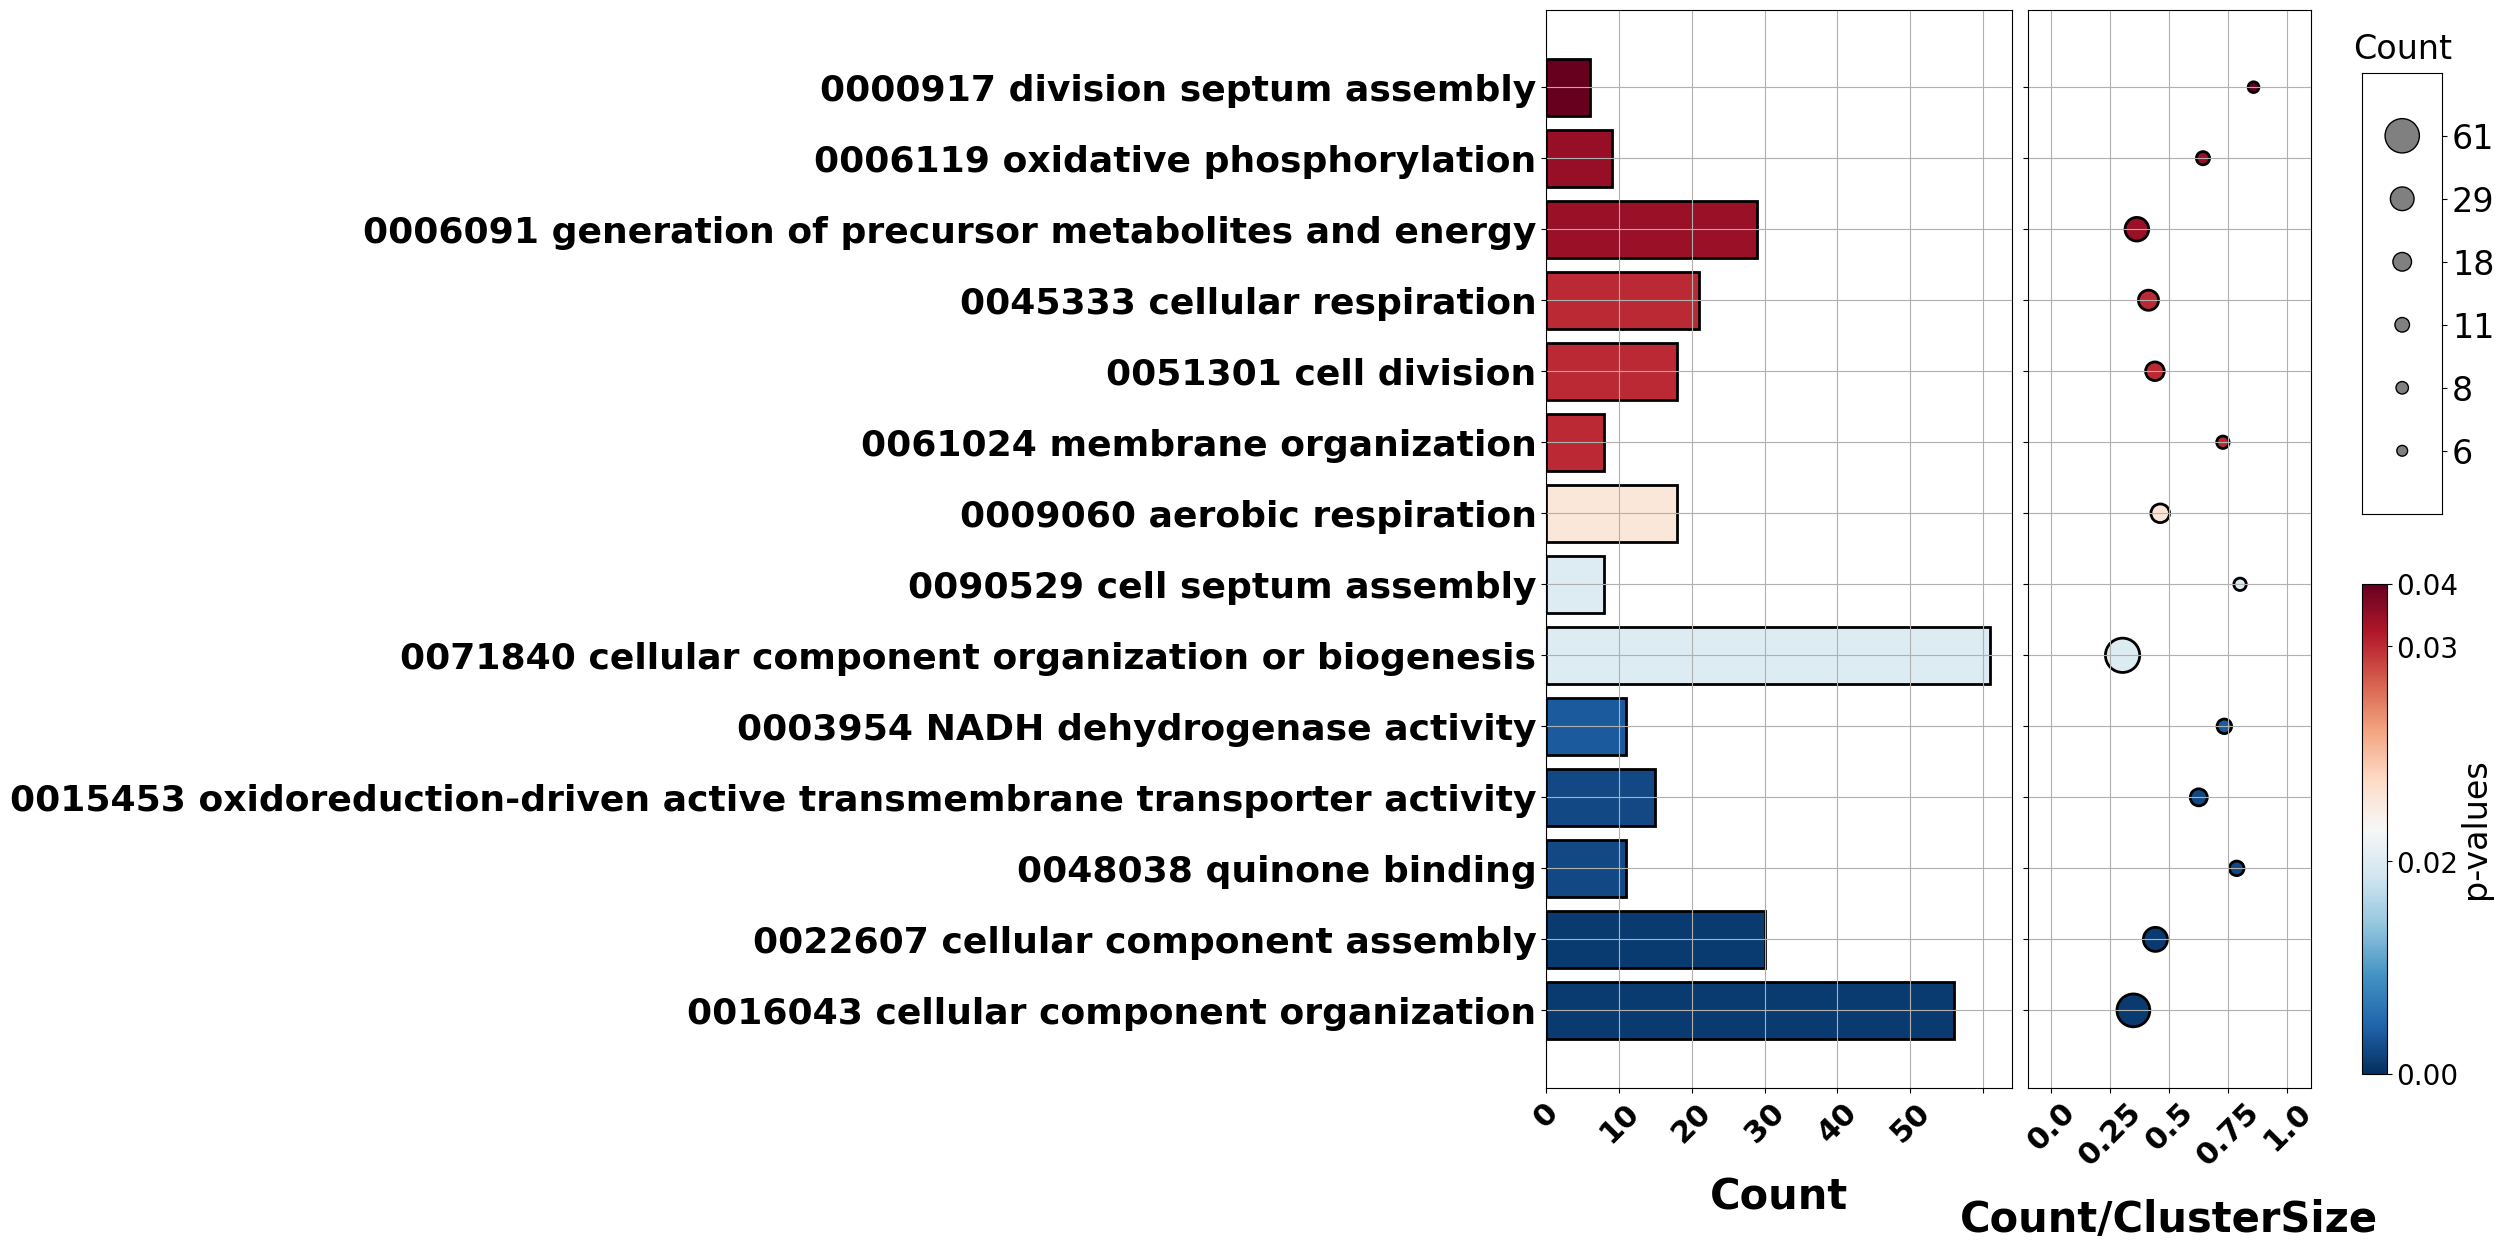

In [97]:
counts = go_counts
marker_size = np.abs(counts)
clustersize = go_clustersize
ratio = np.abs(counts)/clustersize
labels = ylabels_go

pvals = go_pvalue
pcolors = pvals
norm_p_values = np.array(pcolors) / max(pcolors)
colors=plt.cm.RdBu_r(norm_p_values)

sorted_arr = np.sort(marker_size[marker_size != 0])
indices = np.linspace(0, len(sorted_arr) - 1, 6).astype(int)
reduced_arr = sorted_arr[indices]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 14), sharey=False, gridspec_kw={'width_ratios': [2.8, 1.7, 1]})

ax1.sharey(ax2)

ax1.barh(labels,width=counts, color=colors, edgecolor="black", lw=2)
ax2.scatter(y=list(range(len(counts))), x=ratio, s=np.array(marker_size)*10, color=colors, cmap='RdBu_r', edgecolors="black", lw=2)

ax1.set_yticks(range(len(labels)))
ticks = ax1.get_xticks()
ticks = [int(x) for x in ticks]
xlabels = ax1.get_xticklabels()
xlabels = ["0"] + [x.get_text() for x in xlabels[1:-2]]+[""]
ax1.set_xticklabels(xlabels,fontsize=22, fontweight="bold", rotation=45)
ax1.set_yticklabels(labels, fontsize=26, fontdict={'fontweight':"bold"})
ax1.set_xlabel("Count", fontsize=30, labelpad=20,  fontdict={'fontweight':"bold"})
ax1.grid()

ax2.set_xlim(-0.1,1.1)
ax2.set_xticks([0.0,0.25,0.5,0.75,1.0])
ax2.set_xticklabels([0.0,0.25,0.5,0.75,1.0], fontsize=22, fontweight="bold", rotation=45)
ax2.set_xlabel("Count/ClusterSize", fontsize=30, labelpad=20,  fontdict={'fontweight':"bold"})
ax2.tick_params(axis='y', labelleft=False)
ax2.grid()

plt.subplots_adjust(left=0.2, wspace=0.05)

cbar = fig.colorbar(ScalarMappable(cmap='RdBu_r'), ax=[ax1, ax2], pad = 0.005)
cbar.set_label('p-values',fontsize=24, labelpad=0)
cbar.set_ticks([0.0,norm_p_values[5], norm_p_values[8], max(norm_p_values)])
cbar.set_ticklabels([f'{0.00:.2f}',f'{pvals[5]:.2f}',f'{pvals[9]:.2f}', f'{max(pvals):.2f}'])
cbar.ax.tick_params(labelsize=20)

cbar.ax.set_position([0.71, 0.12, 0.03, 0.35])

ax3.set_position([0.71, 0.52, 0.05, 0.315])
ax3.scatter(x=[0.5 for i in reduced_arr], y=[0,1,2,3,4,5], s=np.array(reduced_arr)*10, color="grey", edgecolor="black")
ax3.set_yticks([0,1,2,3,4,5])
ax3.set_yticklabels(reduced_arr, fontsize=24)
ax3.set_xlim(0,1)
ax3.set_ylim(-1,6)
ax3.tick_params(axis='y', labelright=True, labelleft=False)
ax3.tick_params(axis='x', labelbottom=False)
ax3.set_xticks([])
ax3.yaxis.tick_right()   
ax3.set_title("Count", pad=10, fontsize=24)
plt.savefig("../results/figures/goatools/transcriptomics_downregulated_enriched.svg", dpi=400, bbox_inches='tight')

In [ ]:
downregulated_enriched_terms_to_keep = ["GO:0006091","GO:0006119","GO:0009060","GO:"]

In [3]:
go_dataframe = pd.read_table("../results/processed_data/goatools_output/goatools_results_06_up.txt")
filtered_go_dataframe = go_dataframe[go_dataframe["p_fdr_bh"] <= 0.05]
filtered_go_dataframe = filtered_go_dataframe[filtered_go_dataframe["enrichment"] == "e"]
filtered_go_dataframe

,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items
0,GO:0015740,BP,e,C4-dicarboxylate transport,7/585,8/2562,0.000202,7,7,0.013213,"WP_087493662.1, WP_087494329.1, WP_087494507.1..."
1,GO:0006835,BP,e,dicarboxylic acid transport,7/585,8/2562,0.000202,6,7,0.013213,"WP_087493662.1, WP_087494329.1, WP_087494507.1..."
2,GO:0015711,BP,e,organic anion transport,20/585,41/2562,0.000236,4,20,0.014594,"WP_087493662.1, WP_087494329.1, WP_087494356.1..."
3,GO:0006865,BP,e,amino acid transport,25/585,56/2562,0.000280,4,25,0.016800,"WP_087494354.1, WP_087494355.1, WP_087494358.1..."
4,GO:0016042,BP,e,lipid catabolic process,18/585,35/2562,0.000297,5,18,0.017266,"WP_087493546.1, WP_087493583.1, WP_087493674.1..."
5,GO:0046942,BP,e,carboxylic acid transport,19/585,39/2562,0.000352,5,19,0.018749,"WP_087493662.1, WP_087494329.1, WP_087494356.1..."
6,GO:0015849,BP,e,organic acid transport,19/585,40/2562,0.000503,4,19,0.023785,"WP_087493662.1, WP_087494329.1, WP_087494356.1..."
7,GO:0032787,BP,e,monocarboxylic acid metabolic process,43/585,117/2562,0.000629,7,43,0.028706,"WP_087493518.1, WP_087493524.1, WP_087493580.1..."
8,GO:0006810,BP,e,transport,96/585,317/2562,0.000992,3,96,0.041361,"WP_087493496.1, WP_087493662.1, WP_087493708.1..."
49,GO:0030288,CC,e,outer membrane-bounded periplasmic space,16/585,33/2562,0.001187,3,16,0.034911,"WP_087494328.1, WP_087494500.1, WP_087494505.1..."
